<a href="https://colab.research.google.com/github/shehanshaman/pre-datastorm-v1-0/blob/master/Data_Storm_1_0_other_methods_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict

import matplotlib.pyplot as plt

In [0]:
def randomForest(dataFrame, target):

  #Create a svm Classifier
  clf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=42)
  scores = cross_val_score(clf, dataFrame, target, cv=3)

  return scores.mean()

def returnScoreDataFrameModels(dataFrame):
  lists1 = []
  lists2 = []
  lists3 = []

  for i in [24, 23, 22, 21, 20, 19, 18, 17, 16 , 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]:

    # lists1.append(svmLinear(dataFrame.iloc[:,0:(i)], y))
    # lists2.append(svmGaussian(dataFrame.iloc[:,0:(i)], y))
    lists3.append(randomForest(dataFrame.iloc[:,0:(i)], y))

  rows = ["randomForest"]

  data = np.array([lists3])
  randomForestScore = pd.DataFrame(data=data, index=rows).transpose()

  return randomForestScore

In [85]:
#read train data set
df = pd.read_csv("drive/My Drive/FYP/dataset/credit_card_default_train.csv", index_col=0)

#train data set pre processing

#convet to string balance limit to float
df.Balance_Limit_V1 = (df.Balance_Limit_V1.replace(r'[KMB]+$', '', regex=True).astype(float) * df.Balance_Limit_V1.str.extract(r'[\d\.]+([KMB]+)', expand=False).fillna(1).replace(['K','M', 'B'], [10**3, 10**6, 10**9]).astype(int))
df.head()

#gender education marital age stringto int convert
df.Gender.replace(['M', 'F'], [1, 0], inplace=True)
df.EDUCATION_STATUS.replace(['Graduate', 'High School', 'Other'], [2, 1, 0], inplace=True)
df.MARITAL_STATUS.replace(['Other', 'Single'], [1, 0], inplace=True)
df.AGE.replace(['Less than 30', '31-45', '46-65','More than 65'], [3, 2, 1, 0], inplace=True)

df.head()

,Balance_Limit_V1,Gender,EDUCATION_STATUS,MARITAL_STATUS,AGE,PAY_JULY,PAY_AUG,PAY_SEP,PAY_OCT,PAY_NOV,PAY_DEC,DUE_AMT_JULY,DUE_AMT_AUG,DUE_AMT_SEP,DUE_AMT_OCT,DUE_AMT_NOV,DUE_AMT_DEC,PAID_AMT_JULY,PAID_AMT_AUG,PAID_AMT_SEP,PAID_AMT_OCT,PAID_AMT_NOV,PAID_AMT_DEC,NEXT_MONTH_DEFAULT
Client_ID,,,,,,,,,,,,,,,,,,,,,,,,
A2,1000000.0,1,2,1,2,-1,-1,-1,-1,-1,-1,3248,3389,6004,39418,162772,-13982,3437,6004,39418,162772,0,538165,0
A3,1000000.0,0,1,1,3,0,-1,-1,-1,-1,0,353351,151818,26948,43530,80811,124590,151818,46200,43530,80811,942,33666,0
A4,100000.0,0,1,0,2,4,3,2,2,-2,-2,16681,16082,15477,0,0,0,0,0,0,0,0,0,1
A5,200000.0,0,2,0,2,2,0,0,0,0,0,90457,92848,95193,97309,100353,102740,3855,3890,3696,4620,4049,3918,1
A6,1000000.0,0,2,1,2,2,2,0,0,0,0,429556,419466,429785,435354,445271,453899,0,20790,16170,17325,16401,17325,0


In [0]:
X = df.drop("NEXT_MONTH_DEFAULT",1)   #Feature Matrix
y = df["NEXT_MONTH_DEFAULT"]          #Target Variable

In [87]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=f_classif, k=10)

fit = bestfeatures.fit(X,y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']  #naming the dataframe columns
# print(featureScores.nlargest(24,'Score'))  #print 10 best features

selectedFeatures = featureScores.nlargest(24,'Score')
df_24F = df[selectedFeatures['Feature'].values]
# df_24F['NEXT_MONTH_DEFAULT'] = y
df_24F.head()

,PAY_JULY,PAY_AUG,PAY_SEP,PAY_OCT,PAY_NOV,PAY_DEC,Balance_Limit_V1,PAID_AMT_JULY,PAID_AMT_AUG,PAID_AMT_SEP,PAID_AMT_OCT,PAID_AMT_NOV,PAID_AMT_DEC,Gender,EDUCATION_STATUS,MARITAL_STATUS,DUE_AMT_JULY,DUE_AMT_AUG,DUE_AMT_SEP,DUE_AMT_OCT,DUE_AMT_NOV,DUE_AMT_DEC,AGE
Client_ID,,,,,,,,,,,,,,,,,,,,,,,
A2,-1,-1,-1,-1,-1,-1,1000000.0,3437,6004,39418,162772,0,538165,1,2,1,3248,3389,6004,39418,162772,-13982,2
A3,0,-1,-1,-1,-1,0,1000000.0,151818,46200,43530,80811,942,33666,0,1,1,353351,151818,26948,43530,80811,124590,3
A4,4,3,2,2,-2,-2,100000.0,0,0,0,0,0,0,0,1,0,16681,16082,15477,0,0,0,2
A5,2,0,0,0,0,0,200000.0,3855,3890,3696,4620,4049,3918,0,2,0,90457,92848,95193,97309,100353,102740,2
A6,2,2,0,0,0,0,1000000.0,0,20790,16170,17325,16401,17325,0,2,1,429556,419466,429785,435354,445271,453899,2


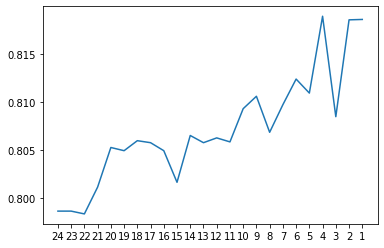

In [88]:
# randomForestScore = returnScoreDataFrameModels(df_24F)
# pcaScore = ["24", "23", "22", "21", "20", "19", "18", "17", "16" , "15", "14", "13", "12", "11", "10", "9", "8", "7", "6", "5", "4", "3", "2", "1"] 

# plt.plot(pcaScore, randomForestScore["randomForest"], label='linear')

In [0]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 

In [196]:
def getTestAcc(df,y):
  x_train,x_test,y_train,y_test = train_test_split(df, y, test_size=0.3, random_state=1) 

  clf = RandomForestClassifier(random_state=42)
  clf.fit(x_train,y_train)
  score = clf.score(x_test,y_test)
  print("Score : %{} using {}".format(score*100, 'RandomForestClassifier'))

  clf = GradientBoostingClassifier(random_state=42,n_estimators=10,max_depth=4)
  clf.fit(x_train,y_train)
  score = clf.score(x_test,y_test)
  print("Score : %{} using {}".format(score*100, 'GradientBoostingClassifier'))

  clf = AdaBoostClassifier(random_state=42,n_estimators=17)
  clf.fit(x_train,y_train)
  score = clf.score(x_test,y_test)
  print("Score : %{} using {} / Training : {}".format(score*100, 'AdaBoostClassifier', cross_val_score(clf, x_train, y_train, cv=3).mean()*100))

  # adding setting the max_leaf_nodes imporved the acccuracy from 78 to 82 
  clf = DecisionTreeClassifier(random_state=42,max_leaf_nodes=3)
  clf.fit(x_train,y_train)
  score = clf.score(x_test,y_test)
  print("Score : %{} using {}".format(score*100, 'DecisionTreeClassifier'))

getTestAcc(df_24F.iloc[:,0:6],y)

Score : %81.47222222222223 using RandomForestClassifier
Score : %82.06944444444444 using GradientBoostingClassifier
Score : %82.26388888888889 using AdaBoostClassifier / Training : 81.66071428571429
Score : %82.15277777777777 using DecisionTreeClassifier


In [183]:
#univerant selection maximum 6 features
# col = ['PAY_JULY', 'PAY_AUG', 'PAY_SEP', 'PAY_OCT', 'PAY_NOV', 'PAY_DEC']
# getTestAcc(df_24F.iloc[:,0:6],y)


Score : %81.47222222222223 using RandomForestClassifier
Score : %82.06944444444444 using GradientBoostingClassifier
Score : %82.23611111111111 using AdaBoostClassifier / Training : 81.44642857142857
Score : %82.15277777777777 using DecisionTreeClassifier


In [176]:
df_24F.iloc[:,0:6].columns

Index(['PAY_JULY', 'PAY_AUG', 'PAY_SEP', 'PAY_OCT', 'PAY_NOV', 'PAY_DEC'], dtype='object')

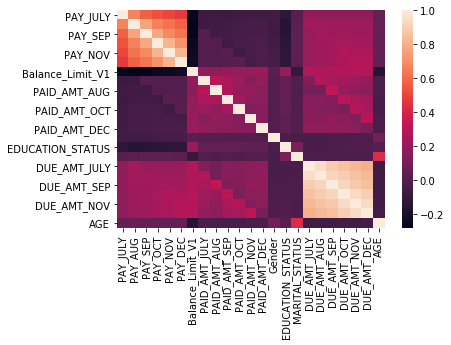

In [122]:
import seaborn as sns

cmp_corr = df_24F.iloc[:,0:24].corr()
sns.heatmap(cmp_corr)

In [0]:
def getSelectedDF(df, corr, ran):
  columns = np.full((corr.shape[0],), True, dtype=bool)
  for i in range(corr.shape[0]):
      for j in range(i+1, corr.shape[0]):
          if corr.iloc[i,j] >= ran or corr.iloc[i,j] <= -ran:
              if columns[j]:
                  columns[j] = False

  selected_columns = df.columns[columns]
  df_selected = df[selected_columns]

  return df_selected

In [0]:
df_tmp = getSelectedDF(df_24F, cmp_corr, 0.15)

In [134]:
print(df_tmp.columns)
print(df_24F.iloc[:,0:6].columns)

Index(['PAY_JULY', 'Gender', 'MARITAL_STATUS'], dtype='object')
Index(['PAY_JULY', 'PAY_AUG', 'PAY_SEP', 'PAY_OCT', 'PAY_NOV', 'PAY_DEC'], dtype='object')


In [135]:
#Correlation matrix 4 features
getTestAcc(df_tmp,y)

Score : %82.09722222222223 using RandomForestClassifier
Score : %82.06944444444444 using GradientBoostingClassifier
Score : %82.15277777777777 using AdaBoostClassifier
Score : %82.15277777777777 using DecisionTreeClassifier


In [136]:
new_col = df_tmp.columns.to_list() + df_24F.iloc[:,0:4].columns.to_list()
print(list(set(new_col)))

['PAY_OCT', 'Gender', 'PAY_JULY', 'PAY_AUG', 'MARITAL_STATUS', 'PAY_SEP']


In [137]:
getTestAcc(X[new_col],y)

Score : %81.29166666666666 using RandomForestClassifier
Score : %82.04166666666667 using GradientBoostingClassifier
Score : %81.76388888888889 using AdaBoostClassifier
Score : %82.15277777777777 using DecisionTreeClassifier
